# **Homework 2: Simple linear regression using TensorFlow in Python**
### Universidad de Monterrey


**Nombre:** Leslie Fabiola López Rosales - 571315

**Programa académico:** Ingeniería en Tecnologías Computacionales

**Profesor:** Dr. Andrés Hernández Gutiérez

**Materia:** Inteligencia Artificial 2


**Lugar y fecha:** *Monterrey, Nuevo León a 30 de agosto del 2024*


---

Antes de iniciar, primero debemos de importar todas las librerías que necesitaremos para poder trabajar. En este caso, para crear una regresión lineal con una neurona, necesitaremos de las siguientes librerías:
- **numpy:** Es una librería de Python que sirve para trabajar con arreglos y operaciones matemáticas (W3S, 2024).
- **tensorflow:** Sirve para generar y entrenar modelos de machine learning (TensorFlow, 2024). Para este caso, se usa para diseñar, entrenar y validar una neurona.
- **matplotlib.pyplot:** Esta librería usa la capa de scripting pyplot para graficar los datos. Por ejemplo, explorar los datos y graficar el modelo para poder visualizar si tiene buen ajuste.
- **sklearn.model_selection:** Esta librería funciona para hacer selección en el conjunto de datos, como hacer validación cruzada. Para este caso, sólo usaremos el método train_test_split que nos sirve para hacer la división de los datos de entrenamiento y los datos de pueba (Scikit-learn, 2024).

**NOTA:** Usamos el comando "as" para renombrar la librería y no tener que escribir todo el nombre al momento de usar algún método. Por ejemplo, en lugar de escribir matplotlib.pyplot.plot() solo escribimos plt.plot().

In [39]:
#importamos librerías
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Una vez importadas las librerías necesarias, tenemos que cargar los datos con los que estaremos trabajando. En este caso, generamos los datos sintéticos con una función a la que llamaremos *generate_data* y recibe de parámetros un arreglo de los coeficientes de la función, la desviación estándar del ruido para distorcionar un poco los datos que va a generar y cuántos datos sintéticos queremos que la función genere.

Lo que hace esta función es primeramente generar una semilla aleatoria con un valor de 4500.
- Lo que hace esto es para generar los mismos datos aleatorios. Esto es de mucha ayuda para que cada vez que generemos el modelo usemos los mismos datos siempre para poder observar que está aprendiendo y poder también comparar con otros modelos y decidir por el mejor. Si no, los datos generados aleatoriamente estarían cambiando cada que ejecutemos la célula de código y es un poco más complejo poder comparar bien y asegurarnos de que está aprendiendo de la mejor forma. El valor 4500 es sólo un número, podríamos usar 3500 y serían otros datos generados.

Después, la función crea el conjunto de datos para X con el método de numpy np.arrange().
- Para este caso, le decimos que genere un arreglo de 100 datos sintéticos.

Luego genera los datos para Y usando el arreglo de datos de la variable X.
- En este ejercicio, la operación matemática aplicada es una función lineal, utilizando los coeficientes solicitados en los parámetros (10 y 1) y le agregamos el ruido para alterar un poco los resultados y que no sea perfecta la línea de tendencia.

Finalmente, la función *generate_data* regresa los datos sintéticos generados para X y Y.


**NOTA:** Este código realmente no se utiliza al momento de estar entrenando modelos de machine learning en la vida cotidiana, ya que lo que nosotros realmente queremos conocer es la función que aplicamos para los valores de X, y en la vida real no tenemos esa función dada. Esta parte del código es meramente para generar datos para trabajar y entrenar un modelo de regresión lineal usando una nurona artificial, por lo que sabemos que la función es lineal y por eso la función *generate_data* usa una función lineal y=mx+b. Pero sí, en la vida real en teoría no sabemos el comportamiento que tienen los datos y es nuetro trabajo diseñar y entrenar un modelo que mejor se ajuste al comportamiento de los datos :).

In [40]:
#Generamos un dataset
def generate_data(true_coeffs=np.array([10,1]), noise_std=2, num_samples=100):

  #Seed for reproductibility
  np.random.seed(4500)

  #Generate synthetic data
  x = np.arange(0,100,1)
  y = true_coeffs[0] + true_coeffs[1] * x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples)

  #Return features and response
  return(x,y)

Ahora sí, generamos los datos llamando a la función previamente creada de *generate_data*:
- Declaramos la variable *true_coeffs* y le asignamos un arreglo de dos valores: 10 y 1. Estos son los coeficientes (o pesos).
- Creamos la variable *noise_std* con un valor de 5.
- Generamos las variables X y Y con los datos generados con la función *generate_data*

In [41]:
#Genearmos set de datos sintéticos para una simple regresión lineal
true_coeffs = np.array([10,1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

Como parte de la exploración de los datos, sirve mucho graficarlos. Para eso, usamos la librería de matplotlib la capa de pyplot para hacer las gráficas. Utilizamos los siguientes métodos:
- **figure():** Sirve para crear la base de la gráfica y le damos un tamaño de (10,7) para este caso.
- **scatter():** Crea la gráfica de dispersión usando los datos de X y Y. Le agregamos también una etiqueta para identificar que los datos pertenecen al dataset sintético.
- **xlabel():** Agrega la etiqueta del eje horizontal
- **ylabel():** Agrega la etiqueta del eje vertical
- **title():** Agrega el título a la gráfica
- **legend():** Agrega las etiquetas de las leyendas
- **show:()** Para mostrar la gráfica

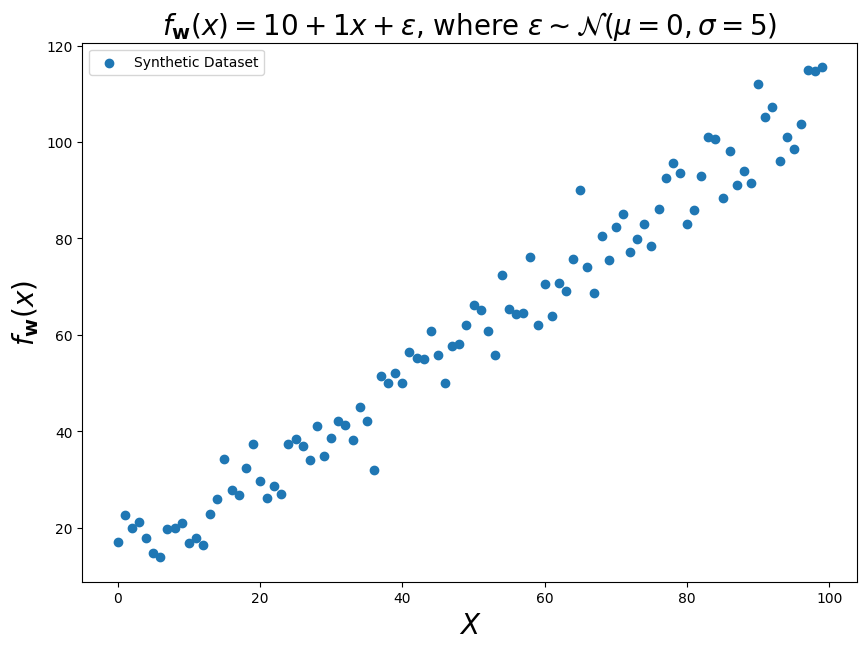

In [42]:
#Exploamos los datos sintetizados al visualizarlos
plt.figure(figsize=(10,7))
plt.scatter(x,y, label='Synthetic Dataset')
plt.xlabel(r"$X$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

Ahora si, es momento de trabajar con los datos para posteriormente generar el modelo. Para empezar, tenemos que separar nuestro conjutno de datos en dos: aquellos datos que usaremos para el entrenamiento y los que usaremos solamente de prueba para evaluar la calidad de nuestro modelo.
- Así que, creamos nuestras variables *x_train* y *y_train* que tendrán el 80% de los datos correspondientes a las variables originales X y Y y se usarán para el entrenamiento del modelo.
- Creamos también neustras variables *x_test* y *y_test* y tendrán el 20% restante de los datos de X y Y respectivamente para usarlos solamente para evaluar el modelo. Estos datos de prueba prácticamente serán nuevos para el modelo.

Para hacer la separación, usamos el método *train_test_split()* que recibe como parámetros el conjunto de datos X, el conjunto de datos para Y, la proporción del tamaño para los datos de prueba, una semilla aleatoria para que la división de datos sea la misma para la reproducibilidad del modelo, y le decimos que también mezcle los datos un poco más antes de separarlos.
- **FUN FACT:** Este método también tiene el parámtero de si los datos divididos aleatoriamente son estratificados *(stratify)*, que significa que al ser separados los conjuntos mantengan la misma proporción del conjunto de datos original. Este parámetro es más útil cuando el modelo hace una clasificación, por eso no es necesario para este caso de una regresión.

In [43]:
#Separamos el dataset original
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

Volvemos a visualizar los datos igual en una gráfica de dispersión. En este caso, diferenciamos con color rojo los datos que serán utilizados para el entrenamiento del modelo, mientras que en azul se quedan los datos de prueba.

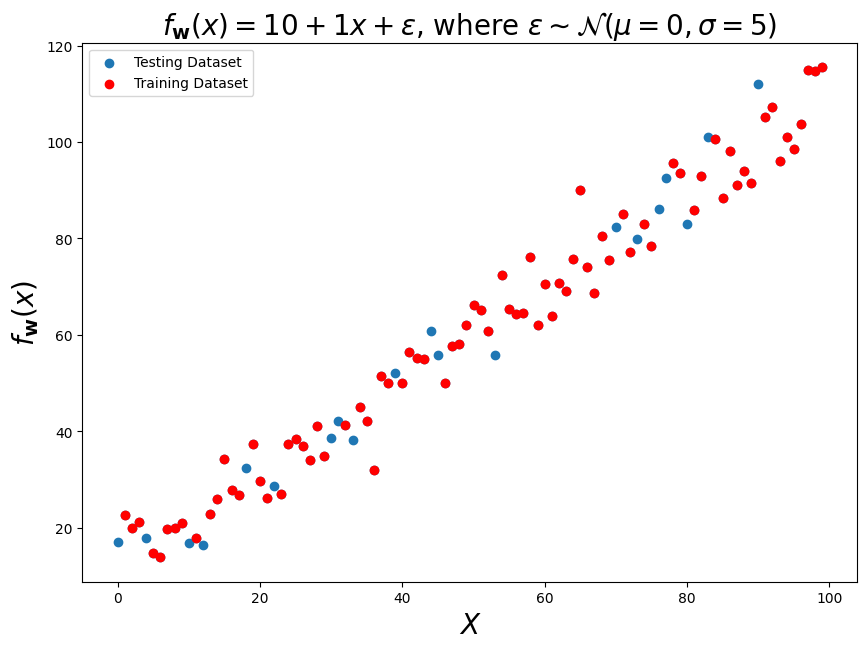

In [44]:
#Visualizamos el dataset separado
plt.figure(figsize=(10,7))
plt.scatter(x,y, label='Testing Dataset')
plt.scatter(x_train, y_train, label='Training Dataset', color=[1,0,0])
plt.xlabel(r"$X$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

A continuación, creamos el modelo usando el método keras.Sequential() de tensorflow. Keras es la API de TensorFlow que sirve de interfaz para usar los métodos y funcionalidades de TensorFlow (TensorFlow, 2024). Con keras, llamamos al método Sequential(), que sirve para construir el modelo de manera secuencial.
- Primero agregamos la capa de entrada con *layers.Input()* y especificamos que el tamaño es de 1 la entrada que recibe la red neuronal artificial.
- Después, agregamos nuestra capa oculta de neuronas con *layers.Dense()*. En este método especificamos que la cantidad de neuronas que tendrá la capa es de 1.
- En teoría, podemos agregar cuantas capas queramos de *layers.Dense()*, pero para este ejercicio que estamos generando un modelo de sólamente 1 neurona con 1 capa basta.

**FUN FACT:** El método layers.Dense() para agregar capas tiene más argumentos que sólo el número de nodos. También se puede especificar la función de activación con *activation*, como por ejemplo la "relu". Sin embargo, para este caso que es lineal. Por default la función de activación es "linear", por eso no se especificó.

In [45]:
#Diseñamos la arquitectura de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

Después de generar el modelo, lo tenemos que compilar con el método *compile()* para poder ya entrenarlo.
+ Uno de los parámteros es el *optimizer* para indicar el optimizador que usará. En este caso, se usará el optimizador "adam" que implementa el algoritmo Adam. Este no es el único optimizador, hay varios más. El optimizador a escoger dependerá del problema que se tiene y cuál mejor se adapta a la situación.
+ También está el parámetro *loss* que sirve para especificar la métrica que el optimizador estará revisando para poder mejorar el modelo. Indica el método que se usará para calcular esta métrica. En este caso, usaremos el Mean Squared Error "mse" como nuestra función de pérdida. De igual manera, el método que se utilice para calcular la pérdida dependerá del problema.

**NOTA:** Este método también tiene más parámetros, pero los que generalmente siempre se usan son el *optimizer* y el *loss*.

In [46]:
#Compilamos el modelo
model.compile(optimizer="adam", loss="mse")

Después, usamos el método summary() para ver los detalles del modelo que acabamos de crear. Nos despliega la siguiente información (TensorFlow, 2024):
- Información de cada una de las capas. En este caso, sólo tenemos 1 capa oculta, y nos dice el tipo de capa que es. En este caso, Dense (oculta) y tiene una neurona artificial.
- También nos dice el tamaño que tiene la salida de la capa. En este caso, es sólo 1 salida.
- Por último, nos dice también el número de parámetros o coeficientes que el modelo deberá de aprender. Este número generalmente se calcula en función de los pesos y el número de capas. La fórmula es la suma total de las multiplicaciones de los números de neuronas entre cada capa adyacente. Es decir, en nuestra arquitectura, la capa de entrada tiene 1 neurona, tiene una capa oculta de 1 neurona, y finalmente una capa de salida con una neurona. Así que, para calcular el número de parámetros sería: (1x1) + (1x1) = 2 parámetros que aprender. En este caso, por ser una regresión lineal de 1 neurona, son 2 los pesos que deberá de aprender (W0 y W1). Y tiene sentido, pues si regresamos a nuestra función *generate_data*, ahí definimos que nuestra regresión lineal tiene los coeficientes 10 y 1. Así que, nuestro modelo deberá de aprender para aproximarse a estos valores para los parámetros.

In [47]:
#Vemos la aqruitectura
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Ahora sí, entrenamos el modelo con el método fit(). Para poder hacer el entrenamiento, le damos al método la siguiente información como parámetros (TensorFlow, 2024):
- **x_train:** El conjunto de datos de entrada.
- **y_train:** El conjunto de datos que son la salida.
- **epochs:** Es el número de épocas para entrenar el modelo.Es decir, el número de veces que el modelo recorre todos los datos de entrenamiento. Para este caso, le decimos que recorrerá 10 veces los datos (epochs=10). Para que el modelo calule los pesos efectivamente, se neceitan un gran número de épocas. Si son pocas, se corre el riesgo de underfitting. En este caso, para ejemplificar este evento, cambié el número de épocas a 10 para observar el comportamiento y después mejoraremos el modelo aumentando las épocas.
- **batch_size:** Es la cantidad de datos en que se divide la época. Una época se divide en batches, ya que es pesado para la computadora hacer cálculos con mucha carga computacional y con grandes conjuntos de datos. Por eso, usamos batches para dividir esa carga y especificamos la cantidad de datos de entrenamiento que compone un batch. En este caso, son 10 datos por batch. Por default es 32 si no se especifica.
- **validation_split:** Se usa para hacer una partición de los datos de entrenamiento que sirven como "prueba" para validar el modelo en cada iteración. No es lo mismo que los datos de prueba test, estos son datos de entrenamiento mismos pero se usan para validar el modelo y así tener un mejor modelo. En este caso, le decimos que el 10% de los datos de entrenamiento se usarán para validar.
- **verbose:** Es simplemente para decir cómo quiero que me despliegue la información a detalle en cada entrenamiento. En este caso, el valor de 1 representa una barra de progreso.

In [48]:
#Entrenamos el modelo con underfitting
model.fit(x_train, y_train, epochs=10, batch_size=10, validation_split=0.10, verbose=1)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 980.1757 - val_loss: 1273.0309
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 846.8348 - val_loss: 1237.6272
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 874.0593 - val_loss: 1201.7927
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 775.6317 - val_loss: 1167.0817
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 864.2440 - val_loss: 1133.0847
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 827.4485 - val_loss: 1100.5354
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 781.2351 - val_loss: 1068.9585
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 799.2626 - val_loss: 1037.5510
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 758.5035 - val_loss: 1007.0848
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 753.7833 - val_loss: 976.7915


Una vez teniendo nuestro modelo entrenado con los datos, evaluamos el modelo. Para eso, usaremos la métrica de pérdida *loss* y el método evaluate() para evaluar. Le pasamos al método ahora si el conjutno de datos especificados para las prueba (*x_test* y *y_test*). También tiene otros parámetros, pero lo principal que nos interesa es pasarle los datos de prueba para que nos regrese la métrica de loss.

In [49]:
#Evaluamos el modelo
loss = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 694.7304

Test Loss: 694.7304077148438


Para tener más información sobre nuestro modelo entrenado, imprimirmos los coeficientes que aprendió. Para ello, utilizamos el método *get_weights()*, que regresa un arreglo de todos los coeficientes o pesos aprendidos. Para este caso, como sólo eran 2 parámetros, fácimente podemos acceder a ellos con los índices 0 para w1 y 1 para w0.

In [50]:
#Imprimimos los pesos del modelo entrenado
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Weights [w1]: [[0.703644]]
Biases [w0]: [0.07769721]


Ahora realizamos las predicciones utilizando los datos de prueba, con el fin de poder calcular los resultados para los valores de entrada usando nuestro modelo.
+ Guardamos en la variable *y_pred* las predicciones que hace el modelo para los datos de prueba, los que el modelo nunca ha visto.
+ Guardamos en la variable *y_pred_train* las predicciones para los datos de entrenamiento. Creamos esta variable para posteriormente poder graficar el modelo con los datos de entrenamiento.

In [51]:
#Hacemos predicciones
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Por último, queremos ver si nuestro modelo realmente se ajusta bien al comportamiento de los datos. Por eso, vamos a volver a graficar nuestros datos origniales en el gráfico de dispersión y también vamos a graficar el modelo con una línea roja, teniendo en cuenta los resultados de las predicciones que el modelo hizo con los datos de prueba.

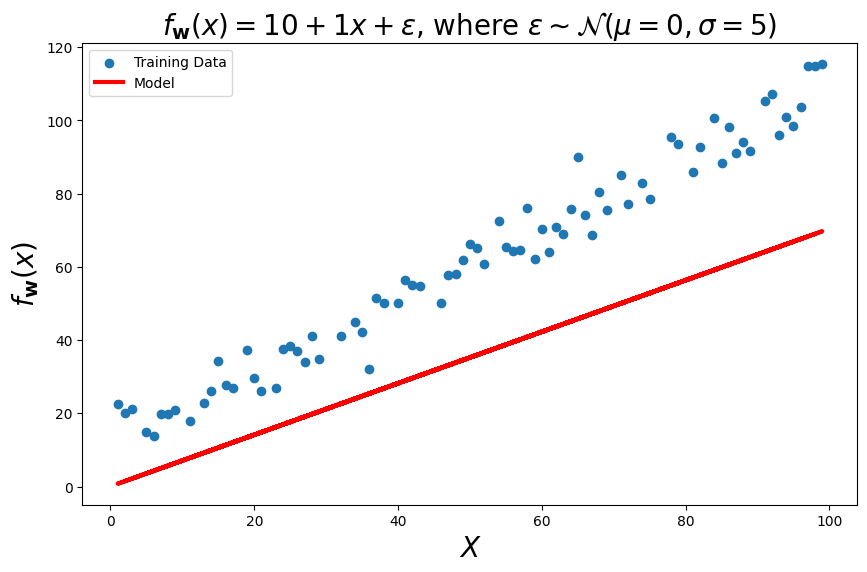

In [52]:
#Visualizamos el modelo entrenado
plt.figure(figsize=(10,6))
plt.scatter(x_train ,y_train , label='Training Data')
plt.plot(x_train,y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r"$X$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

Podemos observar de la gráfica de arriba que el modelo parace tener underfit, ya que la línea roja se encuentra por debajo de los datos de entrenamiento. Esto se puede deber a que el número de épocas (10) fue poco, por lo que ahora mejoraremos el modelo aumentando este número a 500. Así que, volveremos a repetir todo el proceso de entrenamiento y evaluación.

In [53]:
#Entrenamos el nuevo modelo mejorado
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 714.4084 - val_loss: 947.8231
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 689.8245 - val_loss: 919.7182
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 674.8827 - val_loss: 892.7792
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 613.6036 - val_loss: 866.5105
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 639.9650 - val_loss: 840.4978
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 619.8295 - val_loss: 815.3058
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 523.8847 - val_loss: 791.1926
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 538.7704 - val_loss: 766.0519
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 573.2812 - val_loss: 740.7773
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 547.5052 - val_loss: 717.7523
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 516.4866 - val_loss: 694.8740
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

Volvemos a evaluar el modelo. Podemos observar incluso un gran cambio en la pérdida, ya que en el modelo anterior tuvimos un loss de 695 redondeado, mientras que este nuevo modelo ahora sólo tiene una loss de 47 redondeado, lo cual es bueno. Para escoger el mejor modelo, debemos de observar si el loss es pequeño, ya que significa que tiene menos errores al momento de predecir.

In [54]:
#Evaluamos el nuevo modelo mejorado
loss = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 47.2484

Test Loss: 47.24835968017578


Volvemos a imprimir los nuevos pesos calculados. Podemos observar también que para w1 su valor ya llega a 1 (como lo habíamos establecido en la función de *generate_data()*), mientras que en el modelo pasado daba un valor de 0.7. En cambio, para w0 hubo un mayor aumento de 0.08 a casi 2. Esto explica por qué el modelo estaba muy por debajo de los datos de entrenamiento. Sin embargo, es interesante notar que, en teoría, debería de ser un valor cercano a 10 como lo habíamos establecido en la función de *generate_data()*. Como quiera, aunque no sea cercano a 10, el modelo presenta una pérdida pequeña, pero siempre hay espacio para mejorar.

In [55]:
#Imprimimos los pesos del nuevo modelo entrenado
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Weights [w1]: [[1.1183378]]
Biases [w0]: [1.9692197]


Volvemos a realizar predicciones con los datos de prueba y también para los de entrenamiento para poder graficar el modelo nuevo.

In [56]:
#Hacemos nuevas predicciones
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Finalmente, graficamos el nuevo modelo generado. Ahora sí, podemos ver que el modelo representado por la línea roja se ajusta mejor a los datos de entrenamiento, en comparación con el modelo anterior.

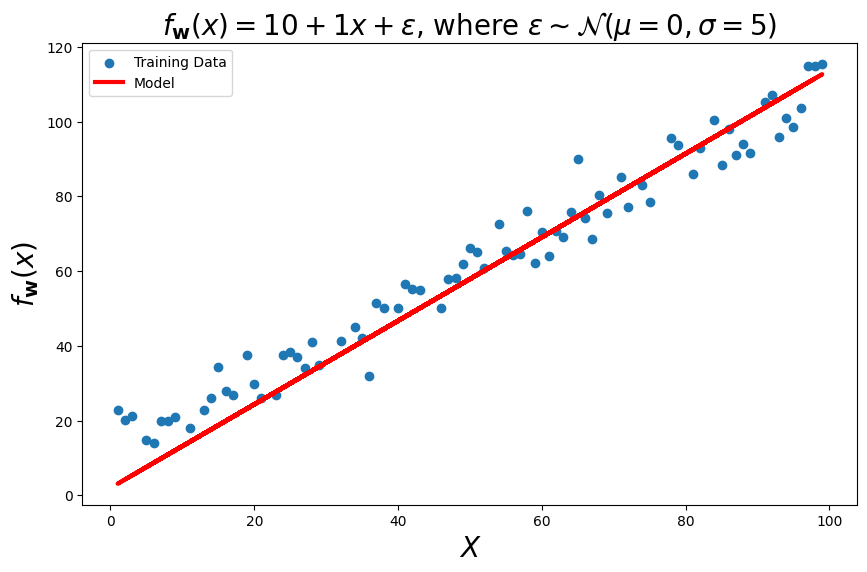

In [57]:
#Visualizamos el nuevo modelo mejorado entrenado
plt.figure(figsize=(10,6))
plt.scatter(x_train ,y_train , label='Training Data')
plt.plot(x_train,y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r"$X$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

## **Conclusiones Personales**

Esta tarea me ayudó mucho a refrescar los temas básicos de deep learning con redes neuronales artificiales aplicado ya a crear modelos usando TensorFlow. La verdad, me sirvió mucho el estar explicando el código célula por célula, pues para poder explicar algo debo primero entender muy bien lo que está pasando. De hecho, me sirvió también para aprender otras cosas que no sabía antes y que omitía cuando hacía modelos en la clase de Inteligenca Artifiial 1. Por ejemplo, no sabía que Keras es la API de TensorFlow; o que el número de épocas es diferente al batch_size. Ahora sé que las épocas en general se refiere a las veces que el modelo entrena los datos al recorrerlos, y el batch_size indica el número de datos que tendrá el batch, pues las épocas se tienen que dividir en batches para que la computadora pueda trabajar un poco más eficiente con grandes conjuntos de datos.


Asimismo, esta tarea también me sirvió mucho a visualizar cuándo se utilizan las funciones de activación, los optimizadores y ver cómo va aprendiendo los coeficientes. La verdad, antes se me dificultaba un poco poder identificar los pesos y calcular cuántos coeficientes va a tener que aprender el modelo. Con este de ejercicio de regresión lineal, me quedó más claro este tema y entender lo que está sucediendo matemáticamente en el modelo. Sin embargo, capaz y porque es un modelo de regresión lineal simple es más sencillo de comprender y visualizar. El reto está ahora sí en crear modelos más complejos, con más capas y aplicando ya diferentes funciones de activación y experimentar con otros optimizadores.


Por último, algo que me funcionó también para comprender bien el tema fue hacer pequeños experimentos para probar cómo funcionan las cosas. Aunque también lo vimos durante la clase, el estar moviendo el valor de los parámetros me ayudó mucho a entender realmente lo que hacen y cómo afecta el modelo. Por ejemplo, en este caso al disminuir el número de épocas ocasiona lógicamente un underfit y luego volver a repetir el experimento con más épocas y observar las mejoras que hace. Tal vez si incrementamos más ese número podemos correr un riesgo de overfit, o no, o podemos mejorar el modelo implementando un early stopping para prevenir justamente eso. Al final del día, eso es lo padre de entrenar los modelos: el ir experimentando y observando cómo va aprendiendo y pensar cómo podemos mejorar y hacerlo de una manera eficiente.

## **Referencias**

+ Scikit-learn. (2024). sklearn.model_selection. Scikit-learn. Recuperado de https://scikit-learn.org/stable/api/sklearn.model_selection.html
+ TensorFlow. (2024). Introducción a TensorFlow. TensorFlow. Recuperado de https://www.tensorflow.org/learn?hl=es
+ TensorFlow. (2024). Keras: la API de alto nivel para TensorFlow. TensorFlow. Recuperado de https://www.tensorflow.org/guide/keras?hl=es
+ TensorFlow. (2024). tf.keras.Sequential. TensorFlow. Recuperado de https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
+ W3S. (2024). NumPy Introduction. W3Schools. Recuperado de https://www.w3schools.com/python/numpy/numpy_intro.asp#:~:text=NumPy%20is%20a%20Python%20library,%2C%20fourier%20transform%2C%20and%20matrices.


**Firma de Honor:** "Yo, Leslie López, doy mi palabra de que he realizado esta tarea con integridad académica"